## VADER : Valence Aware Dictionary and sEntiment Reasoner

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

### The dataset consists of reviews of fine foods from amazon

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(800)
print(df.shape)

(568454, 10)
(800, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Exploratory Data Analysis

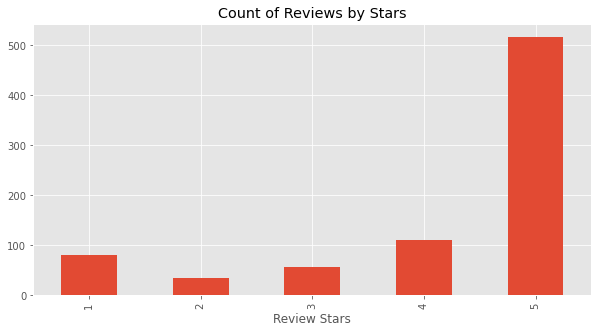

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK

In [9]:
sample = df['Text'][13]
print(sample)

good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!


In [10]:
tokens = nltk.word_tokenize(sample)

In [19]:
tokens[:5]

['good', 'flavor', '!', 'these', 'came']

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [24]:
#part of speech
tagged = nltk.pos_tag(tokens)
tagged[:]

[('good', 'JJ'),
 ('flavor', 'NN'),
 ('!', '.'),
 ('these', 'DT'),
 ('came', 'VBD'),
 ('securely', 'RB'),
 ('packed', 'VBN'),
 ('...', ':'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('fresh', 'JJ'),
 ('and', 'CC'),
 ('delicious', 'JJ'),
 ('!', '.'),
 ('i', 'JJ'),
 ('love', 'VBP'),
 ('these', 'DT'),
 ('Twizzlers', 'NNS'),
 ('!', '.')]

In [26]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [28]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [29]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  good/JJ
  flavor/NN
  !/.
  these/DT
  came/VBD
  securely/RB
  packed/VBN
  .../:
  they/PRP
  were/VBD
  fresh/JJ
  and/CC
  delicious/JJ
  !/.
  i/JJ
  love/VBP
  these/DT
  Twizzlers/NNS
  !/.)


### Using NLTK's SentimentIntensityAnalyzer which will provide negative/positive/neutral scores for the text.
#### Stop words will be removed

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [33]:
sia = SentimentIntensityAnalyzer()

In [34]:
sia.polarity_scores("I don't like the food here!")

{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.3404}

In [35]:
sia.polarity_scores("This might just be the best food ever!!")

{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6988}

### Running polarity scores on the entire dataset

In [36]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/800 [00:00<?, ?it/s]

In [37]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index' : 'Id'})
vaders = vaders.merge(df, how = 'left')

In [38]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plotting the results

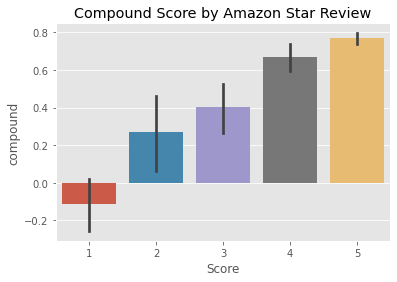

In [40]:
ax = sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

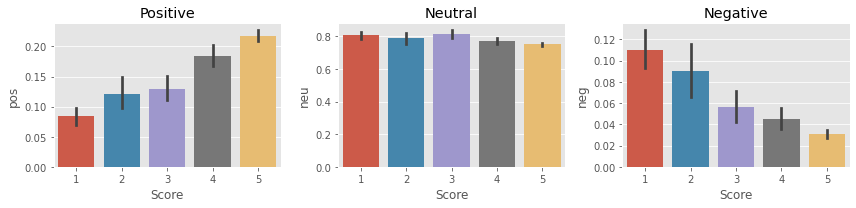

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()